# Term1 Sprint3 機械学習スクラッチ 線型回帰

### 【モデル】
- 線形回帰:y=ax+b<br>
住宅価格=a*家の広さ+b<br>
この𝑎,𝑏を回帰係数という<br>
### 【パラメータ の更新方法】
- 最小二乗法
\begin{align} 
  J_i &= (y_i - \hat{y}_i)^2  \\ 
      &= (y_i - (ax_i + b))^2  \\ 
      &= y_i^2 - 2y_i(ax_i + b) + (ax_i + b)^2  \\ 
\end{align}

- 最急降下方
\begin{align} 
  \theta_{i}^{k+1} &= \theta_{i}^{k} - \alpha \nabla L \\ 
                   &= \theta_{i}^{k} - \alpha \frac{\partial L}{\partial \theta_i} 
\end{align}

### 用語の確認

-　最小二乗法(ordinary least squares:OLS)
>ypとytの差の二乗（二乗誤差）が最小になるようにパラメータを調整する
>誤差を伴う測定値の処理において、その誤差の二乗の和を最小にすることで、最も確からしい関係式を求める方法

- 最急行降下法
>最適化したいパラメータについて微分し勾配を求め、学習率をかけて古いパラメータを更新していくもの

- 評価関数
>精度を評価する物。正解率や適合率RUC曲線のAUCなど

- 損失関数
>予測と実際の値のズレの大きさを表す関数
>機械学習では損失関数が最も小さくなるパラメータを探す
>損失関数には「二乗和誤差」や「交差エントロピー誤差」などがある
>Lが使われる

- 線型回帰（linear regression）
>回帰分析の一種

- 一般化線型モデル(Generalized linear model、GLM)
>残差を任意の分布とした線形モデル
>線形回帰、ポアソン回帰、ロジスティック回帰などが含まれる

-　一般線形モデル（general linear model）
>残差が多変量正規分布に従う物(最小二乗法に従うモデル)
>どちらも GLM と略することが可能だが、R言語では一般線形モデルを lm()、一般化線形モデルを glm() としている

- ロジスティック回帰（Logistic regression）
>ベルヌーイ分布に従う変数の統計的回帰モデルの一種
>モデルは同じく1958年に発表された単純パーセプトロンと等価であるが、scikit-learnなどでは、
>パラメータを決める最適化問題で確率的勾配降下法を使用する物をパーセプトロンと呼び、
>座標降下法や準ニュートン法などを使用する物をロジスティック回帰と呼んでいる。


#### 解法
解析的な解法
> 式変形して解く方法（因数分解して解くイメージ）

数値的な解法
> 数を当てはめて解くイメージ


#### 2種類の解き方
正規方程式
> 解析的な解法。厳密的な解が得られるが、常に解が得られるとは限らない<br>
> LinearRegressionは正規方程式<br>

勾配降下法
> 数値的な解法。結果に誤差が生まれることがあるが、ほとんどの場合で回を求めることができる<br>
> バッチ勾配降下法、確率的勾配降下法、ミニバッチ勾配降下法などがある<br>
> SGDRegressorは勾配降下法

### 正則化
##### 正則化
> 適切な係数を取捨選択したり、係数の大きさを小さくしてか学習を防止する手法。
> 体重を予測するのに、身長は関係ありそうだが、二重かどうかは関係ない
> model.coef_ で各係数を見られる

##### 変数選択
前向きな漸次的選択法
> 係数を一つずつ足して当てはまりの良さを最大にしていく（身長の係数を入れて当てはまりの良さを見て、採用、二重データを入れて不採用というイメージ）

後ろ向きな漸次的選択法
> 全ての係数を入れてから、係数を一つずつ減らして当てはまりの良さを最大にしていく

##### 縮小推定
リッジ回帰
> 係数の絶対値を縮小する

Rosso回帰
> いくつかの係数を0にする

### 仮定関数
予測した関数（線）<br>
特徴量が d個、サンプル数がn個ある場合の仮定関数は行列を使うことで以下のように表せます。<br>
$$\begin{align} \hat{y} = xw \end{align}$$
行列の中身は以下の通りです。書籍によっては行と列の方向が違うことがありますが、今回はこのように定義します。
$$
\begin{align} 
  \hat{y} = \begin{bmatrix} 
    \hat{y_1} \\ 
    \hat{y_2} \\ 
    \vdots \\ 
    \hat{y_n} 
  \end{bmatrix}, 
  w = \begin{bmatrix} 
    w_0 \\ 
    w_1 \\ 
    w_2 \\ 
    \vdots \\ 
    w_d 
  \end{bmatrix}, 
  x = \begin{bmatrix} 
    x_{01} & x_{11} & \cdots & x_{d1} \\ 
    x_{02} & x_{12} & \cdots & x_{d2} \\ 
    \vdots & \vdots & \ddots & \vdots \\ 
    x_{0n} & x_{1n} & \cdots & x_{dn} 
  \end{bmatrix} 
\end{align}
$$
ここで、行列${x}$の一列目成分 $x_{0i}$はすべて１であることに注意してください。切片を考量しない場合はこの列を削除することができます。<br>
理解のため、この行列表現から、サンプル ${i}$番目を取り出します。
$$
\begin{align} 
  \hat{y_i} = w_{0} x_{0i} + w_{1} x_{1i} + w_{2} x_{2i} + … + w_{d} x_{di} 
\end{align}
$$
単回帰と同じように、評価関数、損失関数を定義することが可能です。
$$
\begin{eqnarray} 
  J &=& \frac{1}{n}||y-\hat{y}||^2 \\ 
    &=& \frac{1}{n} (y-\hat{y})^T(y-\hat{y}) \\ 
    &=& \frac{1}{n} (y-xw)^T(y-xw) \\ 
    &=& \frac{1}{n} (y^T y - 2w^T x^T y - w^T x^T x w) 
\end{eqnarray}
$$
一変数の時と同じで、これを微分して最急降下法を適用します。
損失関数${L = J/2}$とします。
$$
\begin{eqnarray} 
  \frac{\partial L}{\partial w} &=& \frac{1}{2n} \frac{\partial}{\partial w} (y^T y - 2w^T x^T y - w^T x^T x w) \\ 
  &=& \frac{1}{2n} (2x^T y - 2x^T x w) \\ 
  &=& \frac{1}{n}  x^T(y - x w) \\ 
  &=& \frac{1}{n}  x^T(y-\hat{y}) 
\end{eqnarray}
$$
となるので、更新式は
$$
\begin{align} 
  w_j = w_j - \frac{\alpha}{n} \sum_{i=1}^{n} (y_i-\hat{y_i})x_{ji} 
\end{align}
$$
となります。
あえて、パラメータを一つに絞って更新式を記述しましたが、行列のままでも計算できます。計算機では行列計算に落とし込むことで処理時間の短縮が可能なので、余裕があれば行列のまま実装することを推奨します。

## スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。
#### 1.仮定関数の実装:_linear_hypothesis
$h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)$<br>
ベクトル表記<br>
$h_\theta(x) = \theta^T \cdot x.$

#### 2.最急降下法の実装（パラメータの更新）:fit
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$

#### 3.推定する仕組みを実装

#### 4.指標値として使う平均二乗誤差の関数を別で作成
$L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.$

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。
$$
h_\theta(x) = \theta^T \cdot x.
$$

サンプル数5、特徴量3の時の例
$$
\begin{align} 
    w = \begin{bmatrix} 
    "bias" & w_0 \\
    "広さ" & w_1 \\
    "距離" & w_2 \\
    "治安" & w_3 \\
  \end{bmatrix}
    ,
  x.T = \begin{bmatrix} 
    "1" & x_{01} & x_{02} & x_{03} & x_{04} & x_{05} \\ 
    "広さ" & x_{11} & x_{12} & x_{13} & x_{14} & x_{15} \\ 
    "距離" & x_{21} & x_{22} & x_{23} & x_{24} & x_{25} \\ 
    "治安" & x_{31} & x_{32} & x_{33} & x_{34} & x_{35} \\ 
  \end{bmatrix} 
  \hat{y} = \begin{bmatrix} 
    \hat{y_1} \\ 
    \hat{y_2} \\ 
    \hat{y_3} \\ 
    \hat{y_4} \\
    \hat{y_5} \\
  \end{bmatrix}
  \hat{y} = \begin{bmatrix} 
    "bias" \times  "1" \times "x1の広さ" \times "x1の距離" \times "x1の治安"\\ 
    \hat{y_2} \\ 
    \hat{y_3} \\ 
    \hat{y_4} \\
    \hat{y_5} \\
  \end{bmatrix}
\end{align}
$$

In [2]:
import numpy as np
import pandas as pd

In [3]:
#検証用データの作成：特徴量が1つ
df = pd.read_csv("train.csv")
index_array = df.columns
index_list = index_array.tolist()
index_list.remove("GrLivArea")
index_list.remove("SalePrice")
df.drop(columns=index_list, inplace=True)

In [4]:
X_1 = df.iloc[:5, :-1].values
y = df.iloc[:5, -1:].values
y = np.ravel(y)

In [5]:
print(X_1.shape)
print(X_1)
print(y.shape)
print(y)

(5, 1)
[[1710]
 [1262]
 [1786]
 [1717]
 [2198]]
(5,)
[208500 181500 223500 140000 250000]


In [6]:
# def _linear_hypothesis(X, theta):
#     """
#     線形の仮定関数を計算する

#     Parameters
#     ----------    
#     X : 次の形のndarray, shape (n_samples, n_features(+1))
#       訓練データ
#     theta：次の形のndarray, shape (1, n_features(+1))
#       パラメーター（重み）

#     Returns
#     -------
#       次の形のndarray, shape (n_samples, 1)
#       線形の仮定関数による推定結果

#     """
    
#     return  X @ theta.T

In [7]:
# X = X_1.copy()
# # バイアスがtrueなら先頭列に1を入れる
# # (n_samples, 1)
# bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
# X = np.concatenate((bias, X), axis=1)
# # シータを1で作成(1, n_features)
# theta = np.ones(X.shape[1]).reshape(1, X.shape[1])

In [8]:
# _linear_hypothesis(X, theta)

動作確認ができたのでクラスに実装する（ひとつのクラスにまとめて実装）

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。<br>
以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。<br>
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

$$
\theta_j := \theta_j - \frac{学習率}{samples} \sum_{i=1}^{samples}[(\hat y - y^{(i)} )x_{j}^{(i)}]
$$
α: 学習率、i: サンプルのインデックス、j: 特徴量のインデックス

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。
仮定関数 $h_\theta(x)$ の出力が推定結果です。

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。<br>
平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。<br>
雛形を用意してあります。
平均二乗誤差は以下の数式で表されます。
$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。
目的関数（損失関数） $J(\theta)$ は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

In [9]:
import matplotlib.pyplot as plt

In [10]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.mean((y_pred - y)**2)
    return mse

In [136]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=5000, lr=0.001, no_bias=False, verbose=False, plot=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # plot用
        self.plot = plot
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------    
        X : 次の形のndarray, shape (n_samples, n_features(+1))
          訓練データ
        theta：次の形のndarray, shape (1, n_features(+1))
          パラメーター（重み）

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        return np.dot(X, self.theta.T)
    
    def _gradient_descent(self, X):
        """
        新しいθ（重みとバイアス）を返す
        
        Parameters
        ----------    
        X : 次の形のndarray, shape (n_samples, n_features(+1))
          訓練データ
        error : 次の形のndarray, shape (1, n_samples)
          残差（yp - yt）
        
        Returns
        -------
        theta_new : 次の形のndarray, shape (1, n_features(+1))
          パラメータ（重み）
        """
        #勾配を求める
#         print("error", self.error.shape)
#         print("X", X.shape)
        grad = self.error.T @ X
#         print("grad", grad.shape)
        #a = grad*self.lr
        #print("a", a.shape)
        #学習率をかけてサンプル数で割る
        theta_new = grad*self.lr/X.shape[0]
#         print("theta_new", theta_new.shape)
        return theta_new
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # バイアスを入れる場合の処理
        if self.no_bias == False:
            X = np.concatenate([np.ones(X.shape[0]).reshape(X.shape[0], 1), X], axis=1)
            if X_val is not None:
                X_val = np.concatenate([np.ones(X_val.shape[0]).reshape(X_val.shape[0], 1), X_val], axis=1)
            
        # 初回はθを1で作成
        self.theta = np.ones(X.shape[1]).reshape(1, X.shape[1])
        
        # yは行列に変形
        y = y.reshape(y.shape[0], 1)
        
        for i in range(self.iter):
            yp = self._linear_hypothesis(X)
            # 残差
#             print("yp", yp.shape)
#             print("y", y.shape)
            self.error = yp - y
            # 損失関数を出す
            self.loss[i] = self.loss_func(yp, y)
            # パラメータ更新
            theta_new = self._gradient_descent(X)
            self.theta -= theta_new
            
#             # thetaが全体的に小さくなってきたら抜ける
#             if np.mean(self.theta) < 2**-1000000:
#                 break
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("theta : ",self.theta)
                print("loss : ",self.loss)
                print("MSE : ",MSE(yp, y))
                
            if X_val is not None and y_val is not None:
                y_val_pred = self.predict(X_val)
                self.val_loss[i] = self.loss_func(y_val_pred, y_val)
                if self.verbose:
                    print("val loss : ",self.val_loss)
                    print("val MSE : ",MSE(y_val_pred, y_val))
        #print("yp :",yp)
        
        if X_val is not None and y_val is not None:
            y_val_pred = self.predict(X_val)
            #print("y_val_pred :",y_val_pred)
            
        if self.plot == True:
            if X_val is not None and y_val is not None:
                self.plot_func(True)
            else:
                self.plot_func()
              
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        #外から呼ばれた場合でバイアスがある場合はXの先頭に１を入れる
        if not X.shape[1] == self.theta.shape[1]:
            X = np.concatenate([np.ones(X.shape[0]).reshape(X.shape[0], 1), X], axis=1)
       
        return X @ self.theta.T
    
    def loss_func(self, y_pred, y):
        """
        目的関数（損失関数）
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples, )
            予測結果
        y : 次の形のndarray, shape (n_samples, )
            y_train or y_val
        i : int
            現在のループの数
        Returns
        -------
            損失関数の結果
        """
        return np.mean((y_pred - y)**2)/2
            
    def plot_func(self, valflg=False):
        plt.title("loss function")
        plt.xlabel("iter")
        plt.ylabel("loss")
        plt.plot(self.loss, c="b")
        
        if valflg == True:
            plt.plot(self.val_loss, c="r")
        plt.show()
    

In [37]:
SLR = ScratchLinearRegression(verbose=True)

In [38]:
X = X_1.copy()
SLR.fit(X, y)

theta :  [[1.99964400e+02 3.51829899e+05]]
loss :  [2.04930968e+10 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  40986193636.8
theta :  [[-6.09883678e+05 -1.08896940e+09]]
loss :  [2.04930968e+10 1.91565534e+17 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  3.831310677248292e+17
theta :  [[1.88831725e+09 3.37163210e+12]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  3.6727915792335747e+24
theta :  [[-5.84654661e+12 -1.04391380e+16]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  3.520831161118787e+31
theta :  [[1.81018880e+16 3.23213205e+19]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  3.3751580501314145e+38
theta :  [[-5.60464787e+19 -1.00072224e+23]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:183: RuntimeWarning: overflow encountered in square
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in subtract


theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  na

 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  na

 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  na

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  na

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  na

 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  na

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  na

MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  na

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e

 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  nan
theta :  [[nan nan]]
loss :  [2.04930968e+10 1.91565534e+17 1.83639579e+24 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MSE :  na

In [39]:
# 学習と推定:線形回帰（勾配降下法使用）
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X, y)
yp = sgd.predict(X)
yp

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([-7.47375065e+15, -5.51571675e+15, -7.80591711e+15, -7.50434493e+15,
       -9.60660899e+15])

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。<br>
scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [52]:
df = pd.read_csv("train.csv")
index_array = df.columns
index_list = index_array.tolist()
index_list.remove("GrLivArea")
index_list.remove("YearBuilt")
index_list.remove("SalePrice")
df.drop(columns=index_list, inplace=True)

In [53]:
# train_test_splitでtrainとvalidationに分ける
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.iloc[:, :-1].values, np.log(df.iloc[:, -1:]).values, train_size=0.75)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [54]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [55]:
# 学習と推定:線形回帰（勾配降下法使用）
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor()
sgd_model.fit(X_train_std, y_train)
y_val_pred = sgd_model.predict(X_val_std)
y_val_pred

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([12.51725298, 12.34915927, 11.4433247 , 12.10342091, 12.35182943,
       12.50433689, 12.19805429, 12.07465507, 11.69474095, 11.70898786,
       11.94273298, 11.63089635, 11.74011542, 11.75516254, 12.29191904,
       12.24358298, 12.21159086, 11.64447785, 11.72060833, 12.96019208,
       11.72012991, 12.17353351, 12.18268539, 12.05295503, 11.69766002,
       12.19892005, 11.67609962, 11.84035261, 11.87711313, 11.77703136,
       11.68136222, 11.71316977, 12.24730225, 11.38001924, 12.31986646,
       12.18379644, 11.53411616, 12.25134574, 12.26400076, 11.66685546,
       11.17905066, 12.3013332 , 12.68709278, 12.06591848, 12.44095371,
       11.62990916, 12.70360551, 12.31244489, 12.14239016, 11.93595862,
       11.61151311, 11.81625927, 12.39442326, 11.66318232, 11.94552699,
       11.59291671, 11.59358091, 11.8059684 , 12.10860701, 11.59358091,
       11.71818588, 12.68178404, 12.24588278, 11.52545849, 12.16614109,
       11.74519346, 11.91301152, 11.87936559, 12.07823472, 12.26

In [56]:
slr = ScratchLinearRegression(verbose=False)
slr.fit(X_train_std, y_train,X_val_std, y_val)

In [57]:
yp = slr.predict(X_val_std)
yp.T

array([[12.44294239, 12.27720016, 11.36859115, 12.03040921, 12.28037263,
        12.43232846, 12.12306759, 12.00363051, 11.61841577, 11.63706825,
        11.86832878, 11.55688727, 11.66714969, 11.68229549, 12.22057732,
        12.17173637, 12.14020945, 11.57152047, 11.64777678, 12.88573149,
        11.64729987, 12.10241746, 12.11190539, 11.97929922, 11.6255571 ,
        12.1267759 , 11.60275117, 11.76853138, 11.80415514, 11.70497115,
        11.60799726, 11.64050748, 12.17537102, 11.30570324, 12.24566471,
        12.11279409, 11.45902468, 12.17954773, 12.19230894, 11.59375489,
        11.10179062, 12.2301808 , 12.61451074, 11.99193015, 12.36834171,
        11.55685159, 12.63016913, 12.24133058, 12.07166368, 11.86281593,
        11.53836738, 11.73955268, 12.32122775, 11.58987441, 11.87235427,
        11.52019413, 11.52195058, 11.73461987, 12.03681928, 11.52195058,
        11.64631036, 12.60951048, 12.17461261, 11.450686  , 12.09490234,
        11.67337908, 11.84285908, 11.80501437, 12.0

In [58]:
print("sklearnのモデルで学習した結果の二乗誤差:", MSE(y_val_pred, y_val))
print("スクラッチモデルで学習した結果の二乗誤差:",MSE(yp, y_val))

sklearnのモデルで学習した結果の二乗誤差: 0.296458316295676
スクラッチモデルで学習した結果の二乗誤差: 0.053315137107284846


## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。<br>
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

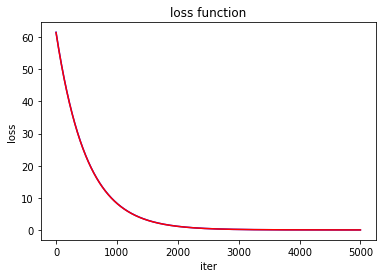

In [59]:
slr = ScratchLinearRegression(verbose=False, plot=True)
slr.fit(X_train_std, y_train,X_val_std, y_val)

## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 $\theta_0$ を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

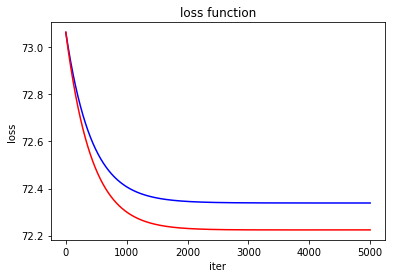

In [60]:
slr_nb = ScratchLinearRegression(verbose=False, no_bias=True, plot=True)
slr_nb.fit(X_train_std, y_train,X_val_std, y_val)

In [61]:
yp_nb = slr_nb.predict(X_val_std)

In [62]:
print("sklearnのモデルで学習した結果の二乗誤差:", MSE(y_val_pred, y_val))
print("スクラッチモデルで学習した結果の二乗誤差:",MSE(yp, y_val))
print("バイアス項除去のスクラッチモデルで学習した結果の二乗誤差:",MSE(yp_nb, y_val))

sklearnのモデルで学習した結果の二乗誤差: 0.296458316295676
スクラッチモデルで学習した結果の二乗誤差: 0.053315137107284846
バイアス項除去のスクラッチモデルで学習した結果の二乗誤差: 144.44890935014482


【考察】バイアス項除去で、切片がなくなるため精度が悪くなった

## 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

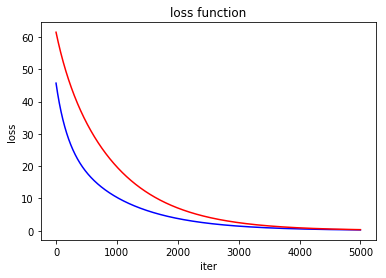

In [63]:
# 二乗
slr_multidim_2 = ScratchLinearRegression(verbose=False, no_bias=False, plot=True)
slr_multidim_2.fit(X_train_std**2, y_train,X_val_std, y_val)
yp_mul2 = slr_nb.predict(X_val_std**2)

In [145]:
add2 = X_train_std**2
add2.shape

(1095, 2)

In [146]:
X_train_std_add2 = np.concatenate([X_train_std, add2], axis=1)
X_train_std_add2.shape

(1095, 4)

In [147]:
X_val_std_add2 = np.concatenate([X_val_std, X_val_std**2], axis=1)

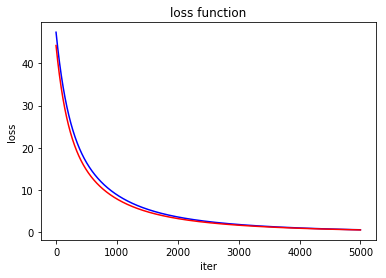

In [149]:
# 二乗を追加したデータ
slr_multidim_add2 = ScratchLinearRegression(verbose=False, no_bias=False, plot=True)
slr_multidim_add2.fit(X_train_std_add2, y_train, X_val_std_add2, y_val)
yp_mul2_add2 = slr_multidim_add2.predict(X_val_std_add2)

In [143]:
print("sklearnのモデルで学習した結果の二乗誤差:", MSE(y_val_pred, np.ravel(y_val)))
print("スクラッチモデルで学習した結果の二乗誤差:", MSE(yp, y_val))
print("二乗を追加したXをスクラッチモデルで学習した結果の二乗誤差:",MSE(yp_mul2_add2, y_val))

sklearnのモデルで学習した結果の二乗誤差: 0.04918924369165265
スクラッチモデルで学習した結果の二乗誤差: 0.053315137107284846
二乗を追加したXをスクラッチモデルで学習した結果の二乗誤差: 1.1051340501084024


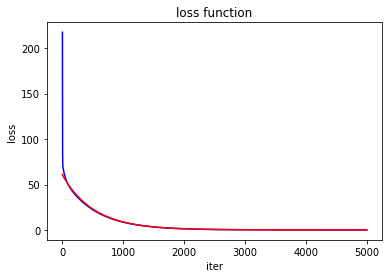

In [65]:
# 三乗
slr_multidim_3 = ScratchLinearRegression(verbose=False, no_bias=False, plot=True)
slr_multidim_3.fit(X_train_std**3, y_train,X_val_std, y_val)
yp_mul3 = slr_nb.predict(X_val_std**3)

In [66]:
print("sklearnのモデルで学習した結果の二乗誤差:", MSE(y_val_pred, np.ravel(y_val)))
print("スクラッチモデルで学習した結果の二乗誤差:", MSE(yp, y_val))
print("三乗したXをスクラッチモデルで学習した結果の二乗誤差:",MSE(yp_mul3, y_val))

sklearnのモデルで学習した結果の二乗誤差: 0.04918924369165265
スクラッチモデルで学習した結果の二乗誤差: 0.053315137107284846
三乗したXをスクラッチモデルで学習した結果の二乗誤差: 149.36831806446008


In [150]:
X_train_std_add3 = np.concatenate([X_train_std, X_train_std**3], axis=1)
X_val_std_add3 = np.concatenate([X_val_std, X_val_std**3], axis=1)

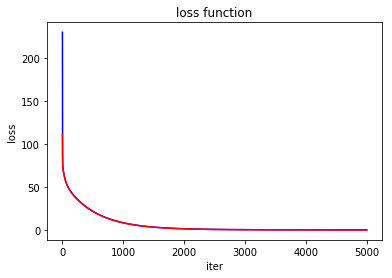

In [151]:
# 三乗を追加したデータ
slr_multidim_add3 = ScratchLinearRegression(verbose=False, no_bias=False, plot=True)
slr_multidim_add3.fit(X_train_std_add3, y_train, X_val_std_add3, y_val)
yp_mul_add3 = slr_multidim_add3.predict(X_val_std_add3)

In [152]:
print("sklearnのモデルで学習した結果の二乗誤差:", MSE(y_val_pred, np.ravel(y_val)))
print("スクラッチモデルで学習した結果の二乗誤差:", MSE(yp, y_val))
print("三乗したXを追加してスクラッチモデルで学習した結果の二乗誤差:",MSE(yp_mul_add3, y_val))

sklearnのモデルで学習した結果の二乗誤差: 0.04918924369165265
スクラッチモデルで学習した結果の二乗誤差: 0.053315137107284846
三乗したXを追加してスクラッチモデルで学習した結果の二乗誤差: 0.14403918200248167


【考察】特徴量を二乗や三乗したデータで学習しても、精度は高くならなかったが、追加することで追加しないときに比べると精度は上がった。<br>
三乗したデータでは、早い段階で損失が小さくなった。

#### 【自習】多項式データを追加した時の線型回帰

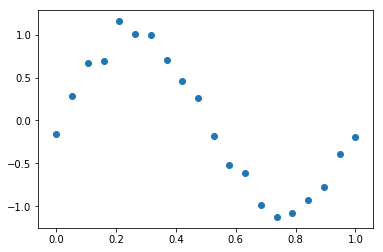

In [199]:
# データの用意
data_size = 20
x_sin = np.linspace(0, 1, data_size)
noise = np.random.uniform(low=-1.0, high=1.0, size=data_size)*0.2
y_sin = np.sin(2.0*np.pi*x_sin) + noise
plt.scatter(x_sin, y_sin)

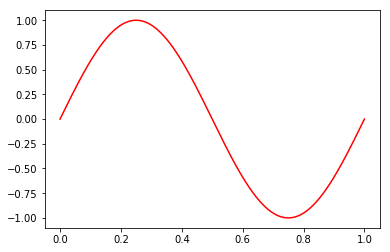

In [200]:
x_line = np.linspace(0, 1, 1000)
sin_x = np.sin(2.0*np.pi*x_line)
plt.plot(x_line, sin_x, "red")

In [201]:
def plot_sin():
    plt.scatter(x_sin, y_sin)
    plt.plot(x_line, sin_x, "red")
    

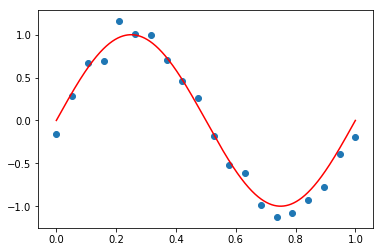

In [202]:
plot_sin()

In [193]:
from sklearn.linear_model import LinearRegression

In [196]:
lin_reg = LinearRegression().fit(x_sin.reshape(-1, 1), y_sin)

In [197]:
# 切片:intercept_,係数：coef_
lin_reg.intercept_, lin_reg.coef_

(0.7068286897518823, array([-1.51288424]))

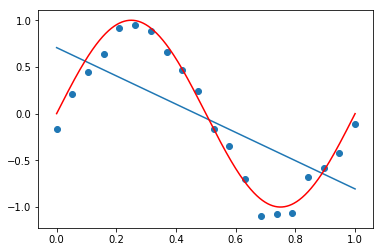

In [198]:
plt.plot(x_line, lin_reg.intercept_ + lin_reg.coef_ * x_line)
plot_sin()

In [216]:
# xを二乗したものを入れてみる
x_mul2 = x_sin**2
lin_reg_mul2 = LinearRegression().fit(x_mul2.reshape(-1, 1), y_sin)

In [217]:
# 切片:intercept_,係数：coef_
lin_reg.intercept_, lin_reg.coef_

(0.7068286897518823, array([-1.51288424]))

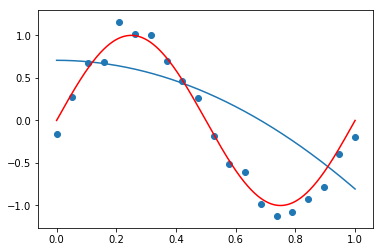

In [218]:
plt.plot(x_line, lin_reg.intercept_ + lin_reg.coef_ * x_line**2)
plot_sin()

In [219]:
# xを3乗したものを入れてみる
x_mul3 = x_sin**3
lin_reg_mul3 = LinearRegression().fit(x_mul3.reshape(-1, 1), y_sin)

In [220]:
# 切片:intercept_,係数：coef_
lin_reg.intercept_, lin_reg.coef_

(0.7068286897518823, array([-1.51288424]))

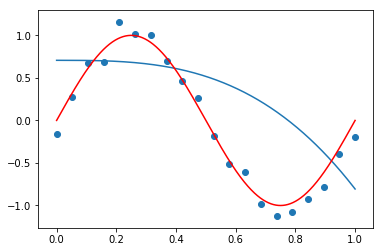

In [221]:
plt.plot(x_line, lin_reg.intercept_ + lin_reg.coef_ * x_line**3)
plot_sin()

In [222]:
# xとxを二乗したものを追加してみる
x_sin_2 = x_sin**2

In [223]:
x_new = np.concatenate([x_sin.reshape(-1, 1), x_sin_2.reshape(-1, 1)], axis=1)

In [224]:
x_new

array([[0.        , 0.        ],
       [0.05263158, 0.00277008],
       [0.10526316, 0.01108033],
       [0.15789474, 0.02493075],
       [0.21052632, 0.04432133],
       [0.26315789, 0.06925208],
       [0.31578947, 0.09972299],
       [0.36842105, 0.13573407],
       [0.42105263, 0.17728532],
       [0.47368421, 0.22437673],
       [0.52631579, 0.27700831],
       [0.57894737, 0.33518006],
       [0.63157895, 0.39889197],
       [0.68421053, 0.46814404],
       [0.73684211, 0.54293629],
       [0.78947368, 0.6232687 ],
       [0.84210526, 0.70914127],
       [0.89473684, 0.80055402],
       [0.94736842, 0.89750693],
       [1.        , 1.        ]])

In [225]:
lin_reg_2 = LinearRegression().fit(x_new, y_sin)

In [226]:
lin_reg_2.intercept_, lin_reg_2.coef_

(0.7383159517151298, array([-1.1048693 , -0.64693643]))

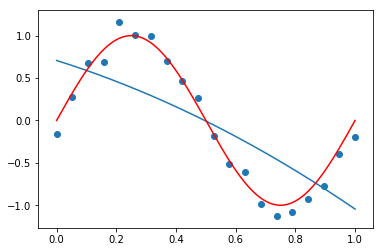

In [227]:
plt.plot(x_line, lin_reg.intercept_ + lin_reg_2.coef_[0] * x_line + lin_reg_2.coef_[1] * x_line**2)
plot_sin()

In [228]:
from sklearn.preprocessing import PolynomialFeatures

In [231]:
# 3乗を追加
poly = PolynomialFeatures(degree=3)
poly.fit(x_sin.reshape(-1, 1))
x_poly_3 = poly.transform(x_sin.reshape(-1, 1))

In [232]:
lin_reg_3 = LinearRegression().fit(x_poly_3, y_sin)

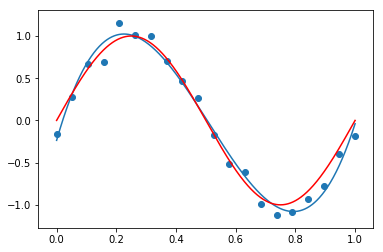

In [233]:
x_line_poly_3 = poly.fit_transform(x_line.reshape(-1, 1))
plt.plot(x_line, lin_reg_3.predict(x_line_poly_3))
plot_sin()

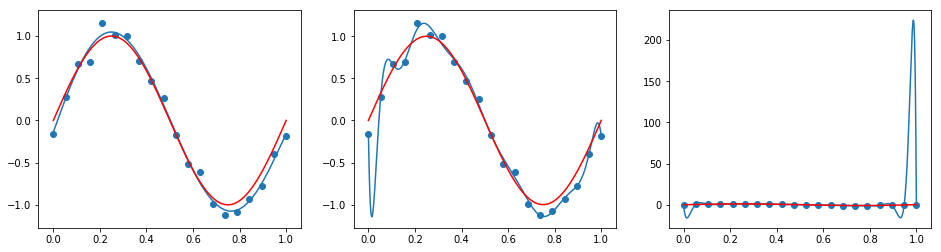

In [234]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# 5乗、15乗、25乗で比較
for degree, ax in zip([5, 15, 25], axes):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x_sin.reshape(-1, 1))
    lin_reg = LinearRegression().fit(x_poly, y_sin)
    x_line_poly = poly.fit_transform(x_line.reshape(-1, 1))
    ax.plot(x_line, lin_reg.predict(x_line_poly))
    ax.scatter(x_sin, y_sin)
    ax.plot(x_line, sin_x, "red")

【考察】5乗では精度が高くなったが、15乗以降では過学習となってしまい汎化性能が低いモデルとなった

## 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$
以下の式から説明をはじめることができます。
$$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\
$$
目的関数（損失関数） $J(\theta)$ は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$\alpha$ : 学習率


i : サンプルのインデックス


j : 特徴量のインデックス

j番目の特徴量にかける重み（パラメーター）、$\theta_{j}$を更新するために、損失関数を重み（パラメータ）で偏微分をして接線の傾きを求める<br>
損失関数を重み（パラメータ）で偏微分をして接線の傾きを求めることで、どちらの方向に重みを変化させれば損失が減少するかわかる
$$
\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta) \\
:= \theta_j - \alpha \frac{1}{2m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]\\
:= \theta_j - \alpha \frac{1}{2m} \sum_{i=1}^{m}[(\theta^T \cdot x) - y^{(i)} )x_{j}^{(i)}]\\
$$

In [156]:
x = np.array([[1, 5, 3.2],
    [1, 5, 3.5],
    [1, 5, 2.3],
    [1, 5.5, 2.3],
    [1, 6.1, 3.0]])
y = np.array([0, 0, 1, 1, 1])
alpha = 0.01
w = np.array([1, 0.8, 0.5])
x.shape

(5, 3)

In [160]:
yt = x @ w.T
yt

array([6.6 , 6.75, 6.15, 6.55, 7.38])

In [174]:
error = yt - y
error

array([-3.35 , -3.2  , -4.8  , -5.395, -5.759])

In [175]:
# w1の時
error * [5, 5, 5, 5.5, 6.1]

array([-16.75  , -16.    , -24.    , -29.6725, -35.1299])

In [176]:
s = sum(error * [5, 5, 5, 5.5, 6.1])
s

-121.55239999999998

In [177]:
# w1から引く値
s / 5 * alpha

-0.24310479999999995

In [178]:
# パラメータ を更新
w = np.array([1, 1.2431, 0.5])
yt = x @ w.T
error = yt - y
error

array([8.8155 , 8.9655 , 7.3655 , 7.98705, 9.08291])

In [179]:
s = sum(error * [5, 5, 5, 5.5, 6.1])
s / 5 * alpha

0.450134052

更新したパラメータで予測されるyと正解ラベルの差が小さくなるようにパラメーターを更新していく

## 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。<br>
しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

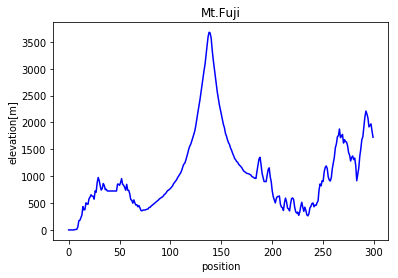

In [188]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0], fuji[:,3], color = "b")
plt.show()

上記グラフのように谷が複数あるグラフでは、谷の底を最適解とするが、その谷が最も低い谷（求めたい最適解）とは限らない。これが局所最適解である。
勾配降下法は数値的な解法（数を当てはめていく）であるため、必ず答えが求められるが、正規方程式（連立方程式を解くような）を使った解析的解法では答えが求められないこともある